In [39]:
import matplotlib.pyplot as plt
import numpy as np

In [40]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples = 100, 
    n_features = 2,
    n_informative = 1, 
    n_redundant = 0,
    n_classes = 2,
    n_clusters_per_class = 1,
    random_state = 41,
    hypercube = False,
    class_sep = 10
)


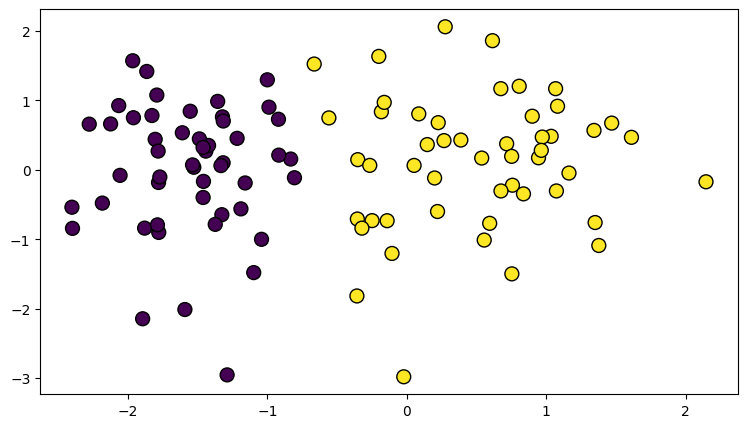

In [41]:
fig, ax = plt.subplots(figsize = (9, 5))
ax.scatter(X[:, 0], X[:, 1], c = y, s = 100, cmap = 'viridis', edgecolor = 'k')

In [42]:
def step(X):
    return 1 if X>=0 else 0

In [43]:
def perceptron(X, y, lr = 0.01, epochs = 1000):
    m = []
    b = []
    X = np.insert(X, 0, 1, axis = 1)
    weights = np.ones(X.shape[1])
    for _ in range(epochs):
        i = np.random.randint(0, X.shape[0])
        Z = np.dot(X[i], weights)
        y_hat = step(Z)
        error = y[i] - y_hat
        weights += lr * error * X[i]
        m.append(-weights[1]/weights[2])
        b.append(-weights[0]/weights[2])
    return m, b

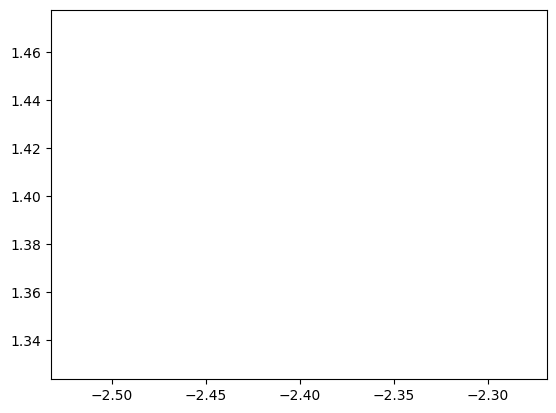

In [46]:
m, b = perceptron(X, y)
Xi = np.linspace(X[:, 0].min(), X[:, 0].min(), 100)
yi = m[0] * Xi + b[0]
line, = plt.plot(Xi, yi, "red", linewidth = 2)
def update(i):
    label = "epoch {0}.".formate(i+1)
    yi = m[i] * Xi + b[i]
    line.set_ydata(yi)
    line.xlabel(label)
    return line,  

c:\Users\whelm\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


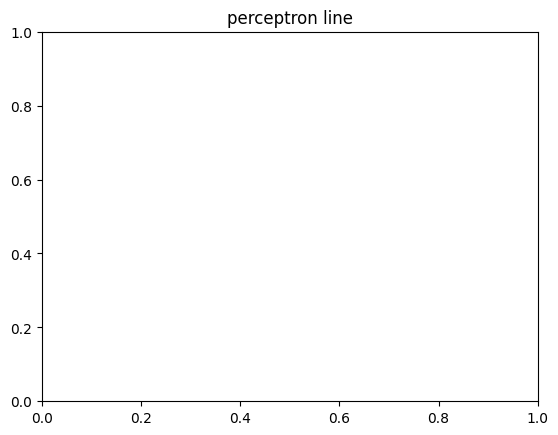

In [47]:
from matplotlib.animation import FuncAnimation
anim = FuncAnimation(fig, update, frames = 500, interval = 30, repeat = False)
plt.title("perceptron line")
plt.show()